In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('American_Housing_Data_20231209.csv')
data

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [3]:
data.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
data.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
County                      object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

In [5]:
data = data.drop(['Address','Latitude','Longitude'], axis=1)   #removing multiple columns
data

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income
0,10013,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0
1,10013,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0
2,10014,1650000.0,1,1,718,New York,New York,29815,23740.9,New York,249880.0
3,10014,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0
4,10014,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0
...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,Seattle,Washington,22890,2086.8,King,205611.0
39977,98199,2295000.0,4,4,2878,Seattle,Washington,22890,2086.8,King,205611.0
39978,98199,950000.0,3,2,1380,Seattle,Washington,22890,2086.8,King,205611.0
39979,98199,425000.0,2,1,856,Seattle,Washington,22890,2086.8,King,205611.0


In [6]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
dtype: int64

In [7]:
imputer = SimpleImputer(strategy ="most_frequent")
data["Median Household Income"]=imputer.fit_transform(data[['Median Household Income']])


In [8]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
dtype: int64

In [9]:
city =LabelEncoder()
data['City']=city.fit_transform(data["City"])
state =LabelEncoder()
data['State']=state.fit_transform(data['State'])
country=LabelEncoder()
data['County']=country.fit_transform(data['County'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2396c40d3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2396c40da00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2396c40d040>],
 'medians': [<matplotlib.lines.Line2D at 0x2396c41c160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2396c41c4f0>],
 'means': []}

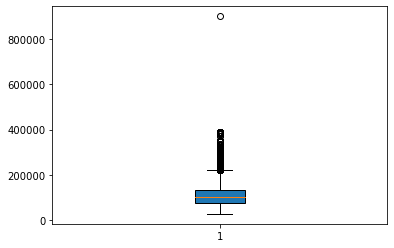

In [10]:
plt.boxplot(data["Median Household Income"],patch_artist=True)

In [11]:
correlation =data.corr()
correlation

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income
Zip Code,1.000000,0.110929,0.014740,0.004543,0.032537,0.084340,-0.210228,-0.024488,-0.105494,-0.038689,0.148384
Price,0.110929,1.000000,0.277072,0.462072,0.520565,0.080209,-0.149707,-0.042924,0.152544,0.030848,0.416784
Beds,0.014740,0.277072,1.000000,0.703425,0.655098,-0.035200,0.042746,0.069366,-0.131888,0.010602,0.014428
Baths,0.004543,0.462072,0.703425,1.000000,0.769079,-0.026429,0.018294,0.001957,-0.068164,-0.024094,0.226399
Living Space,0.032537,0.520565,0.655098,0.769079,1.000000,-0.029992,0.040304,-0.042956,-0.103706,-0.013129,0.222982
City,0.084340,0.080209,-0.035200,-0.026429,-0.029992,1.000000,-0.116763,-0.033618,0.081626,0.308200,0.136396
State,-0.210228,-0.149707,0.042746,0.018294,0.040304,-0.116763,1.000000,0.033955,-0.141414,0.085895,-0.128261
Zip Code Population,-0.024488,-0.042924,0.069366,0.001957,-0.042956,-0.033618,0.033955,1.000000,0.112308,-0.049330,-0.125287
Zip Code Density,-0.105494,0.152544,-0.131888,-0.068164,-0.103706,0.081626,-0.141414,0.112308,1.000000,-0.017102,0.175217
County,-0.038689,0.030848,0.010602,-0.024094,-0.013129,0.308200,0.085895,-0.049330,-0.017102,1.000000,0.025297


<AxesSubplot:>

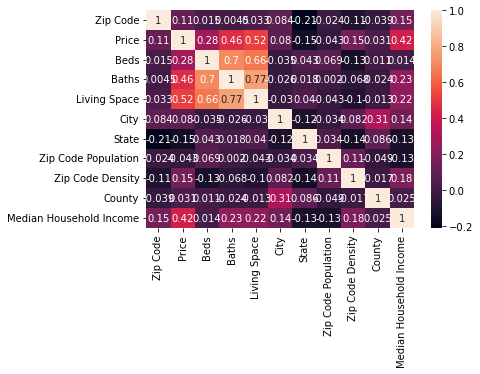

In [12]:
sns.heatmap(correlation,annot=True)

Text(0, 0.5, 'Price')

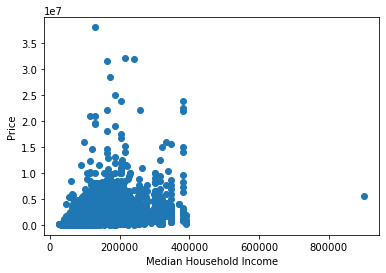

In [13]:
plt.scatter(data['Median Household Income'],data['Price'])
plt.xlabel('Median Household Income')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

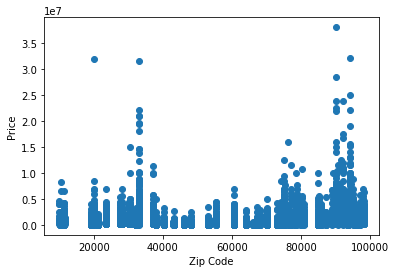

In [14]:
plt.scatter(data['Zip Code'],data['Price'])
plt.xlabel('Zip Code')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

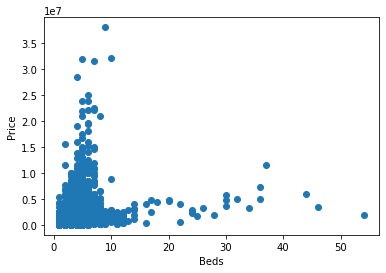

In [15]:
plt.scatter(data['Beds'],data['Price'])
plt.xlabel('Beds')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

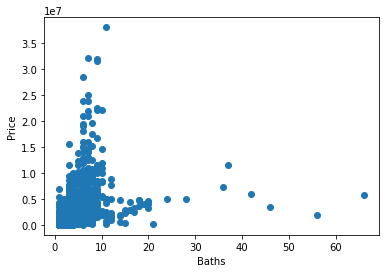

In [16]:
plt.scatter(data['Baths'],data['Price'])
plt.xlabel('Baths')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

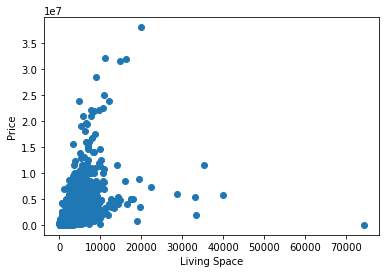

In [17]:
plt.scatter(data['Living Space'],data['Price'])
plt.xlabel('Living Space')
plt.ylabel('Price')

In [18]:
x=data.drop('Price',axis =1)
y=data['Price']

In [19]:
x

,Zip Code,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income
0,10013,2,3,1967,150,18,29563,20967.9,57,370046.0
1,10013,2,3,1967,150,18,29563,20967.9,57,370046.0
2,10014,1,1,718,150,18,29815,23740.9,57,249880.0
3,10014,3,2,1538,150,18,29815,23740.9,57,249880.0
4,10014,1,1,600,150,18,29815,23740.9,57,249880.0
...,...,...,...,...,...,...,...,...,...,...
39976,98199,4,4,3380,204,27,22890,2086.8,46,205611.0
39977,98199,4,4,2878,204,27,22890,2086.8,46,205611.0
39978,98199,3,2,1380,204,27,22890,2086.8,46,205611.0
39979,98199,2,1,856,204,27,22890,2086.8,46,205611.0


In [20]:
y

0        3999000.0
1        3999000.0
2        1650000.0
3         760000.0
4        1100000.0
           ...    
39976    2495000.0
39977    2295000.0
39978     950000.0
39979     425000.0
39980    1150000.0
Name: Price, Length: 39981, dtype: float64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [22]:
x_train.shape ,x_test.shape

((31984, 10), (7997, 10))

In [23]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
model.coef_  

array([ 2.11990377e+00, -7.43854997e+04,  1.42883592e+05,  3.07041815e+02,
        2.83940382e+02, -1.01512218e+04,  9.76133139e-02,  4.60003785e+01,
        1.68373606e+03,  4.71107203e+00])

In [25]:
model.intercept_

-831061.6043122024

In [26]:
model.score(x_test,y_test)

0.43222107945043564

In [27]:
model.score(x_train,y_train)

0.4096121170598438

In [28]:
y_pred = model.predict(x_test)

In [29]:
pd.DataFrame({'True values':y_test, 'Predicted values':y_pred})

,True values,Predicted values
12512,129900.0,5.603688e+04
8140,599000.0,6.371537e+03
16778,299950.0,2.548171e+05
2445,225000.0,1.535171e+05
24414,1350000.0,7.632393e+05
...,...,...
32548,650000.0,6.803992e+05
25995,558580.0,6.120006e+05
29896,2100000.0,1.290593e+06
7664,2390000.0,7.105746e+05


In [30]:
mean_absolute_error(y_test,y_pred)

298390.09944561427

In [31]:
mean_squared_error(y_test,y_pred)

491658621910.14905

In [32]:
model.predict([[1,1,.5,.2,.8,.5,.3,.4,1,1]])

array([-837083.36181351])

In [33]:
import joblib

In [34]:
joblib.dump(model,'PPModel')

['PPModel']

In [35]:
model_reloaded=joblib.load("PPModel")

In [36]:
model.predict([[1,1,.5,.2,.8,.5,.3,.4,1,1]])

array([-837083.36181351])

#### #Normalization Standardization

In [37]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
scaler1 =StandardScaler()
x_train=scaler1.fit_transform(x_train)
x_test =scaler1.transform(x_test)

In [39]:
model2 = LinearRegression()
model2.fit(x_train , y_train)

LinearRegression()

In [40]:
model2.coef_

array([ 54439.7616287 , -99438.0831394 , 187251.72582408, 377531.83377854,
        19900.89990748, -99388.02667458,   1821.34184752, 136533.62940369,
        39572.05364995, 223348.59342034])

In [41]:
model2.intercept_

624829.5858544898

In [42]:
model2.score(x_test,y_test)

0.432221079450428

In [43]:
model2.score(x_train,y_train)

0.4096121170598436

In [44]:
y_pred = model2.predict(x_test)